<a href="https://colab.research.google.com/github/matteovignoli/Esercitazioni/blob/main/Data_driven_investing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating the correlation between the stock price and its ESG score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set()
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Stock price dataset
df_price = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Datasets/SP500_Price_Data.xlsx')
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price.set_index('Date', inplace=True)
df_price.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,12.12,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,12.03,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,12.32,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,12.23,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,12.47,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00


In [3]:
# ESG dataset
df_esg = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/SP500_ESG_Data.csv')
df_esg.head()

,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


In [4]:
# Calculate returns for all stocks
df_returns = df_price.pct_change(1, fill_method=None)
df_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.008264,-0.004053,0.009143,-0.007671,-0.000378,-0.007377,-0.010151,-0.003650,0.023444,-0.007426,...,-0.005643,-0.017198,-0.006584,-0.010481,0.033015,0.006648,-0.007559,-0.013534,0.022063,0.000322
2012-01-05 16:00:00,-0.004514,-0.002220,-0.055493,0.008835,-0.019082,0.000000,0.007072,0.000000,0.006363,0.024106,...,0.017319,-0.010445,0.004418,0.008723,-0.014247,0.007783,-0.001410,0.011840,0.028005,0.000645
2012-01-06 16:00:00,-0.005131,-0.008899,0.013189,-0.007115,-0.001733,0.010735,0.008427,-0.005495,0.004637,-0.007305,...,-0.008368,-0.035186,-0.002933,-0.006485,-0.016797,0.007255,-0.008192,0.002600,0.001135,-0.000322
2012-01-09 16:00:00,0.005997,-0.000374,-0.023669,0.003859,-0.001736,-0.003268,-0.006616,0.029466,-0.000280,0.019624,...,-0.008535,-0.002805,0.000735,0.021759,0.003973,-0.003950,-0.004557,0.007410,0.013605,0.031260


In [5]:
df_master = df_returns.agg(['mean', 'std']).T
df_master.head()

,mean,std
MMM,0.000464,0.013227
ABT,0.000716,0.014076
ABBV,0.000711,0.017848
ABMD,0.001571,0.028260
ACN,0.000812,0.014441


In [6]:
df_master.reset_index(inplace=True)
df_master.columns = ['Ticker', 'Expected Return', 'Total Risk']
df_master.head()

,Ticker,Expected Return,Total Risk
0,MMM,0.000464,0.013227
1,ABT,0.000716,0.014076
2,ABBV,0.000711,0.017848
3,ABMD,0.001571,0.028260
4,ACN,0.000812,0.014441


In [7]:
df_master = df_master.merge(df_esg, left_on='Ticker', right_on='Symbol')
df_master.head()

,Ticker,Expected Return,Total Risk,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,0.000464,0.013227,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,0.000716,0.014076,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,0.000711,0.017848,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,0.001571,0.028260,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,0.000812,0.014441,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


<Axes: xlabel='ESG Risk Score', ylabel='Expected Return'>

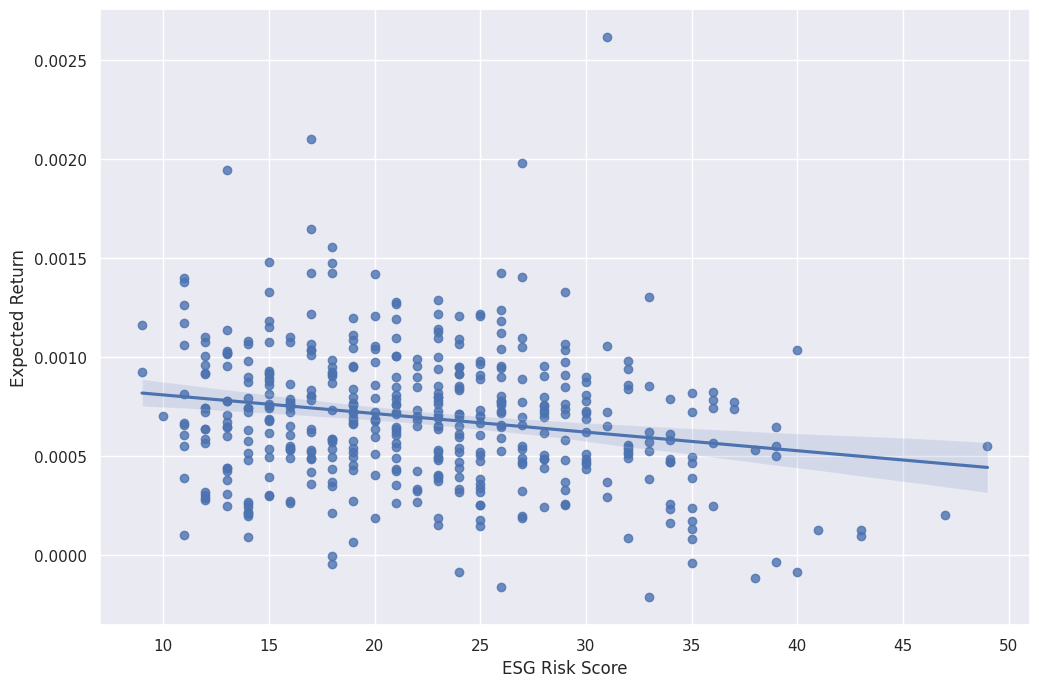

In [8]:
plt.figure(figsize=[12,8])
sns.regplot(y=df_master['Expected Return'], x=df_master['ESG Risk Score'])

Text(0.5, 1.0, 'Expected Return vs Total Risk')

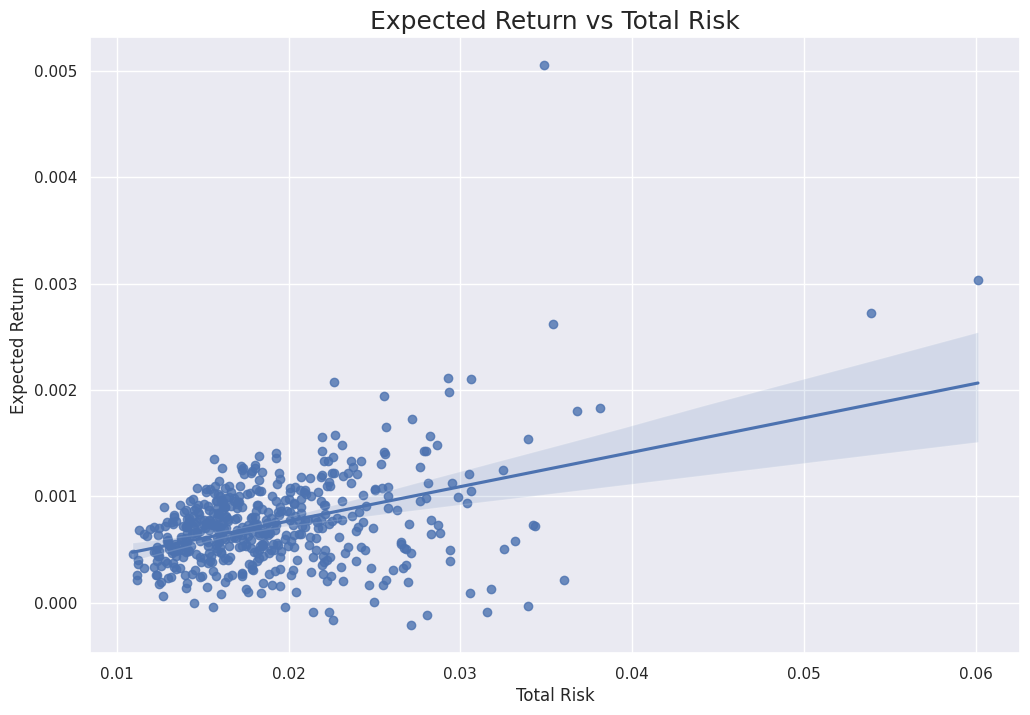

In [14]:
plt.figure(figsize=[12,8])
sns.regplot(y=df_master['Expected Return'], x=df_master['Total Risk'])
plt.title('Expected Return vs Total Risk', fontsize=18)

Text(0.5, 1.0, 'Total Risk vs ESG Risk Score')

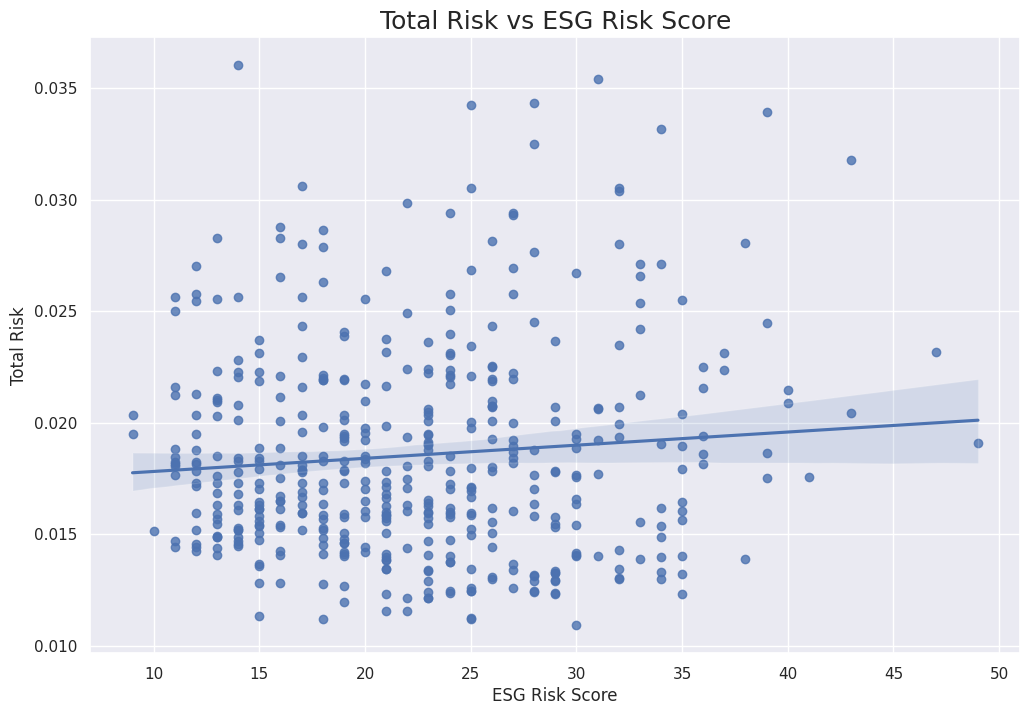

In [13]:
plt.figure(figsize=[12,8])
sns.regplot(y=df_master['Total Risk'], x=df_master['ESG Risk Score'])
plt.title('Total Risk vs ESG Risk Score', fontsize=18)

In [11]:
df_master.corr().round(3)

<ipython-input-11-01eb5e31a0f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_master.corr().round(3)


,Expected Return,Total Risk,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level
Expected Return,1.000,0.408,-0.200,-0.265,-0.013,0.015,-0.110
Total Risk,0.408,1.000,0.092,0.105,0.001,0.042,-0.033
ESG Risk Score,-0.200,0.092,1.000,0.694,0.652,0.426,0.286
Environment Risk Score,-0.265,0.105,0.694,1.000,-0.012,-0.148,0.062
Social Risk Score,-0.013,0.001,0.652,-0.012,1.000,0.414,0.345
Governance Risk Score,0.015,0.042,0.426,-0.148,0.414,1.000,0.188
Controversy Level,-0.110,-0.033,0.286,0.062,0.345,0.188,1.000


<ipython-input-12-6c35bfdadf93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_master.corr().round(3), annot=True)


<Axes: >

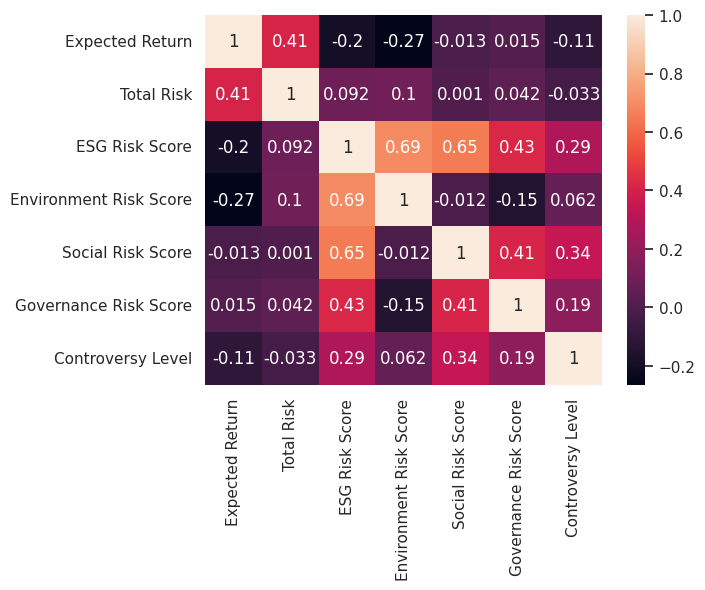

In [12]:
sns.heatmap(df_master.corr().round(3), annot=True)

# Validating our findings

## T-Test

A T-test statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis.

Hypothesis testing allows us to make probabilistic statements about population parameters.

In [19]:
# NaN value handling
df_master.dropna(subset=['ESG Risk Score'])
df_master.reset_index(inplace=True, drop=True)
df_master.head()

,Ticker,Expected Return,Total Risk,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,0.000464,0.013227,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,0.000716,0.014076,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,0.000711,0.017848,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,0.001571,0.028260,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,0.000812,0.014441,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05


In [20]:
def t_stat_corr(df, x, y):
  corr_xy = np.corrcoef(x=df[x], y=df[y])[0][1]
  n = len(df)
  t_stat = (corr_xy * np.sqrt(n-2)) / np.sqrt(1 - corr_xy**2)
  return t_stat